In [ ]:
# 批量转换xls to xlxs
import os
import os.path
import win32com.client as win32

rootdir = r"C:\Users\Administrator\One2021年1-10月东港站气象数据"  # 设置根目录
# 三个参数：父目录；所有文件夹名（不含路径）；所有文件名
for parent, dirnames, filenames in os.walk(rootdir):
    for fn in filenames:
        filedir = os.path.join(parent, fn)
        print(filedir)

        excel = win32.gencache.EnsureDispatch('Excel.Application')
        wb = excel.Workbooks.Open(filedir)
        # xlsx: FileFormat=51
        # xls:  FileFormat=56,
        # 后缀名的大小写不通配，需按实际修改：xls或XLS
        wb.SaveAs(filedir.replace('xls', 'xlsx'), FileFormat=51)  # 这里原文件是大写
        wb.Close()
        excel.Application.Quit()

In [ ]:
import os
import os.path
import win32com.client as win32
from openpyxl  import load_workbook

rootdir = r"E:\Python\2020年6-9月东港站气象数据"   # 设置根目录
# 三个参数：父目录；所有文件夹名（不含路径）；所有文件名
for parent, dirnames, filenames in os.walk(rootdir):
    for fn in filenames:
        filedir = os.path.join(parent, fn)
        print(filedir)
        
        workbook = load_workbook(filename=filedir)  # 删除excel中的部分列
        sheet = workbook.active
        sheet.delete_cols(idx=1, amount=3)
        workbook.save(filename=filedir)

In [ ]:
#  提取需要的数据
import os
import os.path
import win32com.client as win32
from openpyxl  import load_workbook
from openpyxl.utils import FORMULAE

rootdir = r"E:\Python\2021年6-9月东港站气象数据"   # 设置根目录
# 三个参数：父目录；所有文件夹名（不含路径）；所有文件名
for parent, dirnames, filenames in os.walk(rootdir):
    for fn in filenames:
        filedir = os.path.join(parent, fn)
        print(filedir)

        workbook = load_workbook(filename=filedir)
        sheet = workbook.active
        sheet['D1'] = "=LEFT(A2,9)"  # 时间字符串
        cell_p = sheet["C289"]  # 累计降雨量
        sheet['E1'] = cell_p.value
        sheet['F1'] = "=MAX(B2:B289)"  # 最高温度
        sheet['G1'] = "=MIN(B2:B289)"  # 最低温度
        workbook.save(filename = filedir)

In [ ]:
# 将每个文件的部分数据组合成一个列表
import os
import os.path
import win32com.client as win32
from win32com.client import Dispatch
from openpyxl  import load_workbook
import pandas as pd

d = []
rootdir = r"E:\Python\2021年6-9月东港站气象数据"   # 设置根目录
# 三个参数：父目录；所有文件夹名（不含路径）；所有文件名
for parent, dirnames, filenames in os.walk(rootdir):
    for fn in filenames:
        filedir = os.path.join(parent, fn)
        # print(filedir)
        filename = filedir

        def just_open(filename):  # 由于openpyxl有小bug，带公式的单元格必须先打开保存后才能能读数据
            xlApp = Dispatch("Excel.Application")
            xlApp.Visible = False
            xlBook = xlApp.Workbooks.Open(filename)
            xlBook.Save()
            xlBook.Close()

        just_open(filename)  # 读取每个文件，现在可以得到每个公式单元格的值
        workbook = load_workbook(filename=filedir, data_only=True)
        sheet = workbook.active
        data = [sheet["D1"].value, sheet["E1"].value, sheet["F1"].value, sheet["G1"].value]
        d.append(data)
print(d)

In [ ]:
#  写入excel
import openpyxl


def write_excel(data: list):
    workbook = openpyxl.Workbook()
    sheet = workbook.active
    for row_index, row_value in enumerate(d):  # 遍历d大列表
        for col_index, col_value in enumerate(row_value):  # 遍历d中的每一个小列表
            sheet.cell(row=row_index+1, column=col_index + 1, value=col_value)

    try:
        workbook.save("2021年.xlsx")
        return {'status': True}
    except Exception:
        return {'tatus': False}

In [ ]:
write_excel(d)  # 执行write_excel()函数

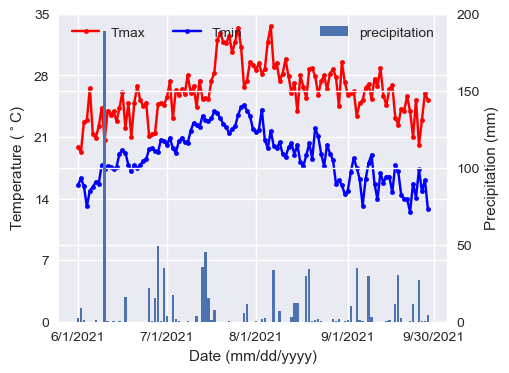

In [41]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


# 文件路径
path = r"E:\Python\2021年气温和降雨.xlsx"
ori_data = pd.read_excel(path)
data = pd.DataFrame(ori_data)

# 绘图
x = data["时间"]  # 现在时间数据为字符串类型
y1 = data["累计降雨（mm）"]
y2 = data["最高气温（℃）"]
y3 = data["最低气温（℃）"]

fig, ax = plt.subplots(1, 1, figsize=(5, 4))  #定义画布/figure“窗口”
plt.style.use('seaborn')
ax.plot(x, y2, 'r-o', markersize=3.5, label='Tmax')  # 画折线图
ax.plot(x, y3, 'b-o', markersize=3.5, label='Tmin')

ax.set_xlabel('Date (mm/dd/yyyy)')
ax.set_xticks(ticks=[0,30,60,91,120])
ax.set_xticklabels(labels=['6/1/2021', '7/1/2021', '8/1/2021', '9/1/2021', '9/30/2021'])
ax.set_ylim([0, 35])
ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_yticks(ticks=[0,7,14,21,28,35])
ax.set_yticklabels(labels=[0,7,14,21,28,35])

ax.legend(loc='upper left', ncol=2)

ax1 = ax.twinx()  # 实现双y轴的重点，共享x轴；还有一种是双x轴的图表换成ax.twiny()
ax1.bar(x, height=y1, label='precipitation')
ax1.set_ylim([0, 200])
ax1.set_ylabel('Precipitation (mm)')
ax1.set_yticks(ticks=[0,50,100,150,200])
ax1.set_yticklabels(labels=[0,50,100,150,200])
ax1.legend(loc='best')

plt.savefig('Tem-Precip2021.tiff', dpi=300, bbox_inches='tight')  # 图表输出到本地
plt.show()

In [ ]:
#plt.savefig('Tem-Precip2020.tiff', dpi=300, bbox_inches='tight', pil_kwargs={"compression": "tiff_lzw"})  # 图表输出到本地